### Importing Useful Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

## STEPS TO CONDUCT EDA

### Sourcing --> Cleaning --> Univariate Analysis --> Segmented Univariate --> Bivariate Analysis

* Sourcing: 
  - Extract data from ./application_data.csv
  - Extract data from ./previous_application.csv
* Cleaning:
  - Removing all columns that have atleast 50% empty data. This would greatly reduce the Data Imbalance in the DataSet as there will be correlation between similar amount of data.
  - Separating Numerical Columns from Categorical Columns. This would allow for easier calculations like standardisation.
* Uivariate Analysis:
  - Create a dataframe that describes the features of the dataset : desc, source, format, nu of rows, each row is..
  - InterQuartile ( Q1-Q3 ) analysis and removing Outliers : Box Plot.
* Segmented Univariate:
  - Segment two Categories and create pivots. Analyse Means.
  - Box Plot analysis for segmented Numerical data.
* Bivariate Analysis:
  - See Correlation between 2 Numerical Columns.
  - Find out the Highest correlated Columns.

In [2]:
# Using encoding = "ISO-8859-1"
dfRaw = pd.read_csv("./application_data.csv")
dfRaw.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## STEP 1: Data Cleaning.

In [3]:
dfRaw.shape

(307511, 122)

In [4]:
dfRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
# dfRaw.isnull().head()

In [6]:
dfRaw.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [7]:
rawSeries = round(100*(dfRaw.isnull().sum()/len(dfRaw.index)), 2)

### Any Column that has 50% or more missing values has been discarded

In [22]:
rawColumnList = dfRaw.columns.tolist()
finalColumnList = rawSeries[rawSeries < 50.0].index.values.tolist()

In [23]:
print(len(rawColumnList))
print(len(finalColumnList))

122
81


In [24]:
df = dfRaw[finalColumnList].copy()

### Separation of the main dataframe into 2 separate dataframes based on Target variable [ 0 | 1 ]

In [25]:
dfTarget1 = df.loc[df.TARGET==1]
dfTarget0 = df.loc[df.TARGET==0]

### Check all the unique values present in each column to get a feel for the data; for unexpected values

In [26]:
listTarget1 = list(dfTarget1.columns)
listTarget0 = list(dfTarget0.columns)

In [27]:
colCount = 12
print(listTarget1[colCount])
pd.unique(dfTarget1[listTarget1[colCount]].values.ravel('K'))

NAME_INCOME_TYPE


array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Unemployed', 'Maternity leave'], dtype=object)

## STEP 2: Standardise Values.

### Convert all the columns that are categorical( YES | NO - 0 | 1 ) to Strings for further calculation convenience

In [28]:
intToString = ['TARGET', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_18', \
               'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_13',\
               'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_8', \
               'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_3', \
               'FLAG_DOCUMENT_2', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', \
               'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION', 'FLAG_EMAIL', 'FLAG_PHONE', 'FLAG_CONT_MOBILE', \
               'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL'
              ]

pd.options.mode.chained_assignment = None  # default='warn'

for x in intToString:
    
#     dfTarget1[x] = dfTarget1[x].apply(str)
#     dfTarget0[x] = dfTarget0[x].apply(str)
    dfTarget1.loc[x] = dfTarget1[x].astype(str)
    dfTarget0.loc[x] = dfTarget0[x].astype(str)


### Extract columns that are numerical as we are told to conduct correlation on only numerical variables.

In [19]:
dfTarget1Numerical = dfTarget1.select_dtypes(include=[np.number])
dfTarget0Numerical = dfTarget0.select_dtypes(include=[np.number])

### Standardise all the numerical variables to easily plot box polots with same scale and
### for the convenience of calculation 

In [23]:
# Change Categorical Variables that are 1 | 0 to True | False to convert them 

# FOR TARGET = 1

x = dfTarget1Numerical.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dfTarget1NumericalStd = pd.DataFrame(x_scaled)
dfTarget1NumColumns = list(dfTarget1Numerical.columns)

dfTarget1NumericalStd.columns = dfTarget1NumColumns
dfTarget1_num = dfTarget1NumericalStd

# FOR TARGET = 0

x = dfTarget0Numerical.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dfTarget0NumericalStd = pd.DataFrame(x_scaled)
dfTarget0NumColumns = list(dfTarget0Numerical.columns)

dfTarget0NumericalStd.columns = dfTarget0NumColumns
dfTarget0_num = dfTarget0NumericalStd

In [24]:
dfTarget1_num.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.000000,0.0,0.001512,0.090793,0.150032,0.086076,0.253810,0.898056,0.040471,0.840893,...,0.333333,0.068966,0.4,0.721376,0.0,0.0,0.0,0.000000,0.000000,0.045455
1,0.000081,0.0,0.000742,0.234765,0.166252,0.184810,0.243084,0.368439,0.035249,0.713320,...,0.166667,0.344828,0.0,0.960442,0.0,0.0,0.0,0.000000,0.105263,0.090909
2,0.000126,0.0,0.001512,0.288394,0.220533,0.227848,0.342216,0.439451,0.038832,0.948447,...,0.000000,0.000000,0.0,0.735872,0.0,0.0,0.0,0.117647,0.000000,0.181818
3,0.000132,0.0,0.000935,0.061233,0.092403,0.054430,0.094088,0.673756,0.032708,0.998037,...,0.000000,0.034483,0.0,0.636364,0.0,0.0,0.0,0.000000,0.000000,0.090909
4,0.000264,0.0,0.000473,0.051975,0.081037,0.058228,0.390830,0.021384,1.000000,0.764873,...,0.166667,0.034483,0.2,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [25]:
dfTarget0_num.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.000000,0.0,0.013594,0.311736,0.132924,0.271605,0.045016,0.477114,0.043648,0.951929,...,0.0,0.002907,0.0,0.807083,0.0,0.0,0.0,0.0,0.000000,0.00
1,0.000003,0.0,0.002328,0.022472,0.020025,0.023569,0.134897,0.348534,0.046161,0.827335,...,0.0,0.000000,0.0,0.810112,0.0,0.0,0.0,0.0,0.000000,0.00
2,0.000008,0.0,0.006084,0.066837,0.109477,0.063973,0.107023,0.350846,0.038817,0.601451,...,0.0,0.005814,0.0,0.856244,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000011,0.0,0.005333,0.116854,0.078975,0.117845,0.392880,0.298591,0.038820,0.825268,...,0.0,0.000000,0.0,0.742311,0.0,0.0,0.0,0.0,0.000000,0.00
4,0.000014,0.0,0.004081,0.111235,0.101018,0.103255,0.491595,0.467193,0.042604,0.798557,...,0.0,0.000000,0.0,0.409133,0.0,0.0,0.0,0.0,0.003831,0.04


### For best correlation results, an approact could be to only use the data between the Quartile regions Q1 - Q3.
### This would be highly representative of the general patterns.
### It would also handle data irregularities and outliers.

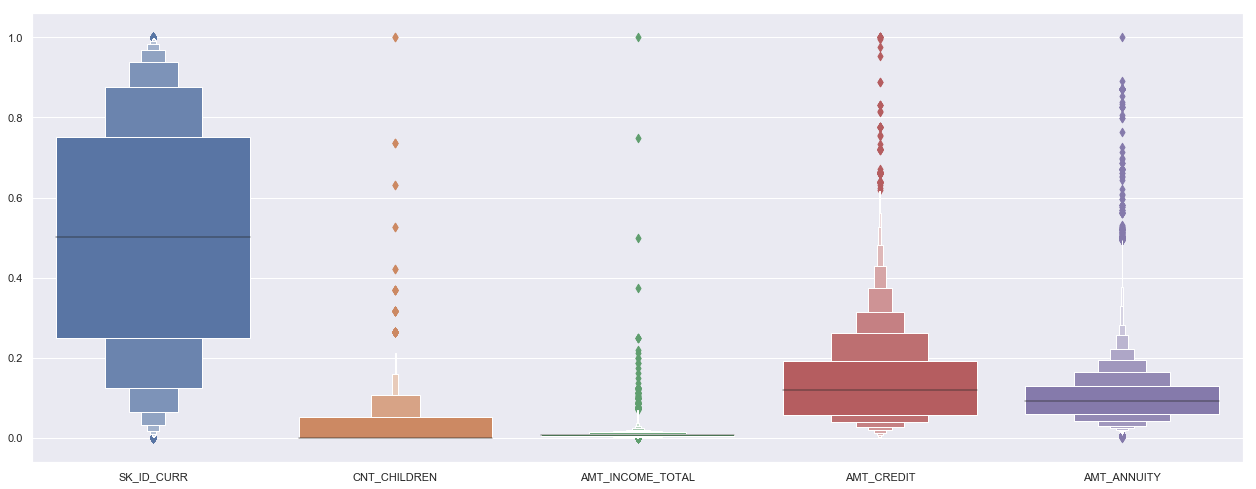

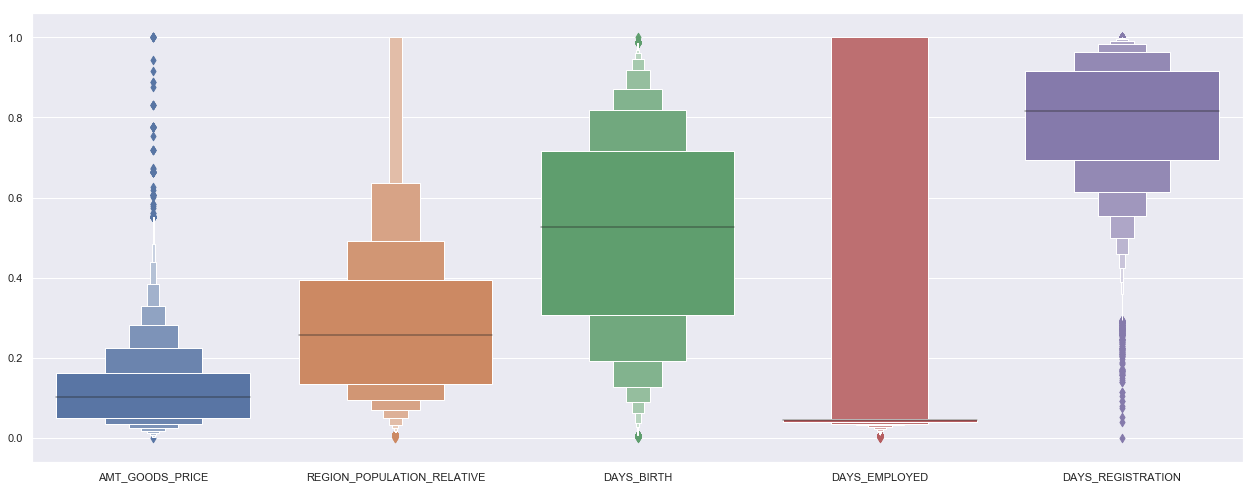

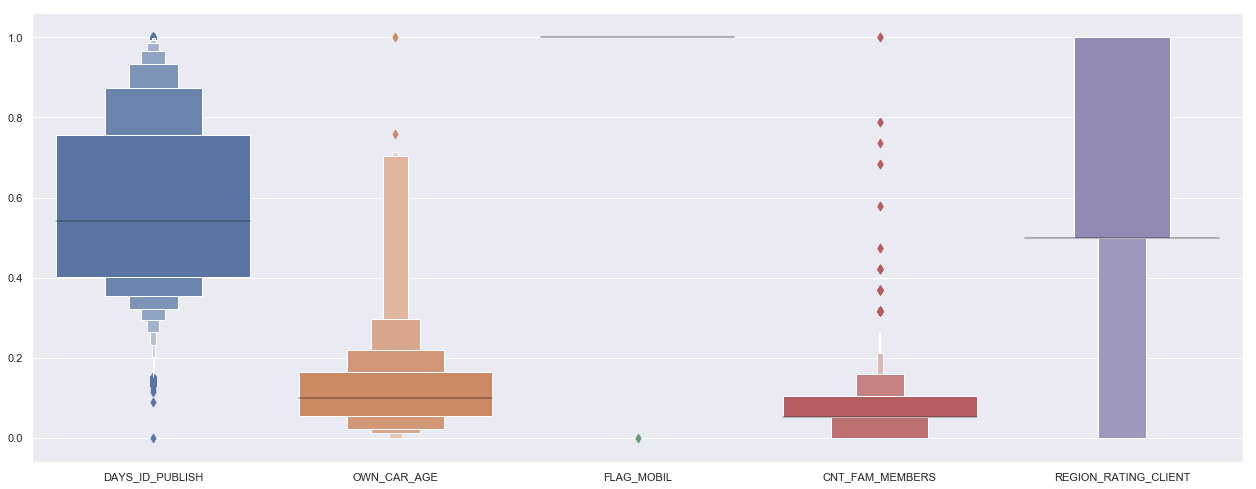

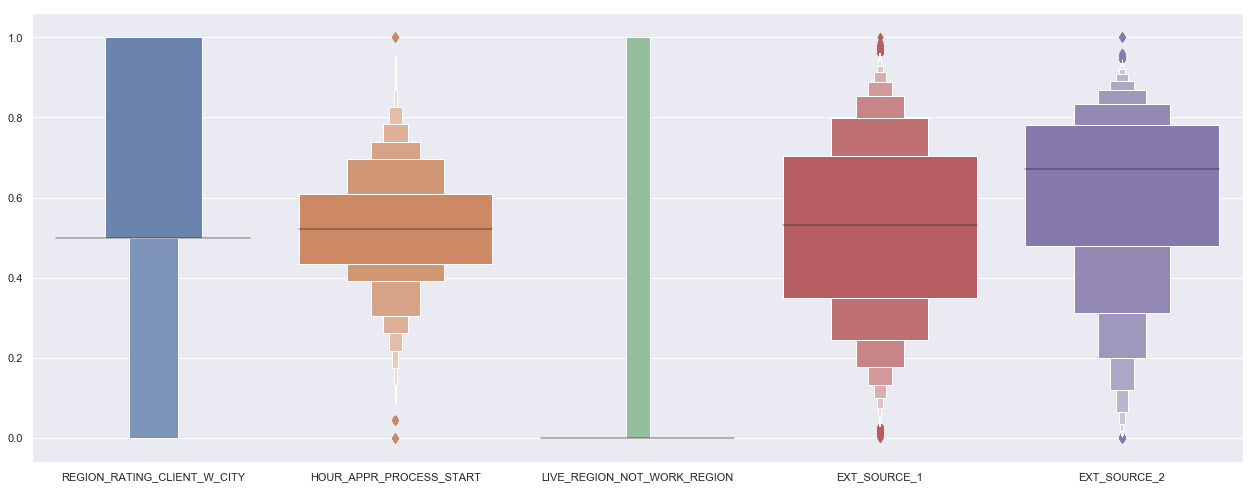

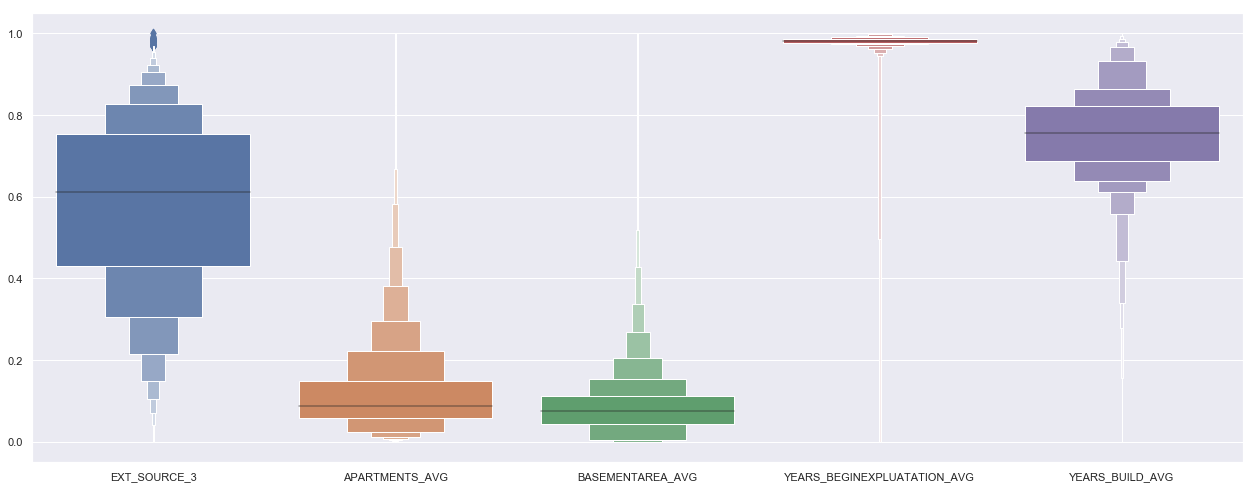

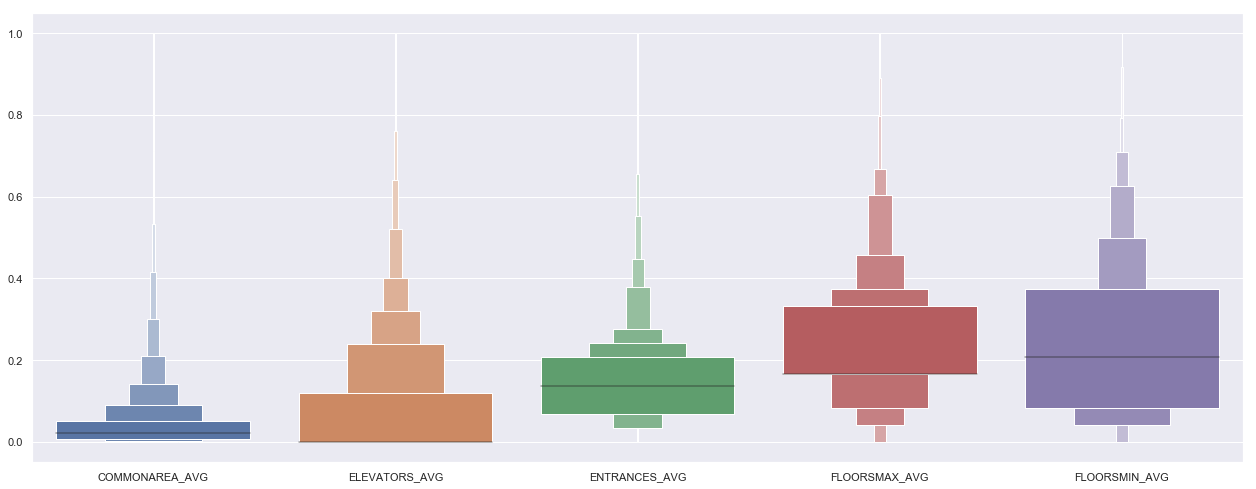

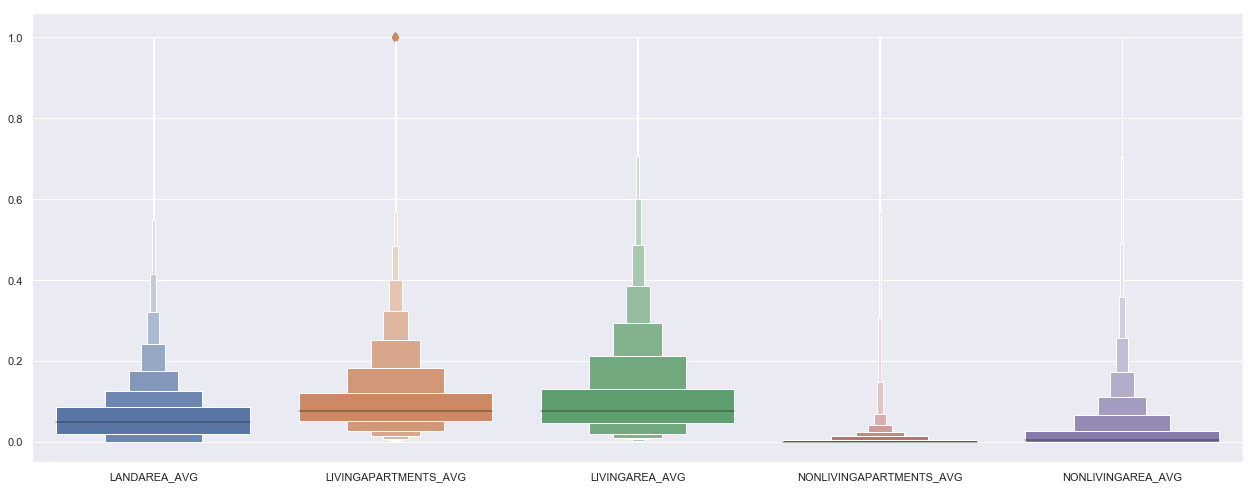

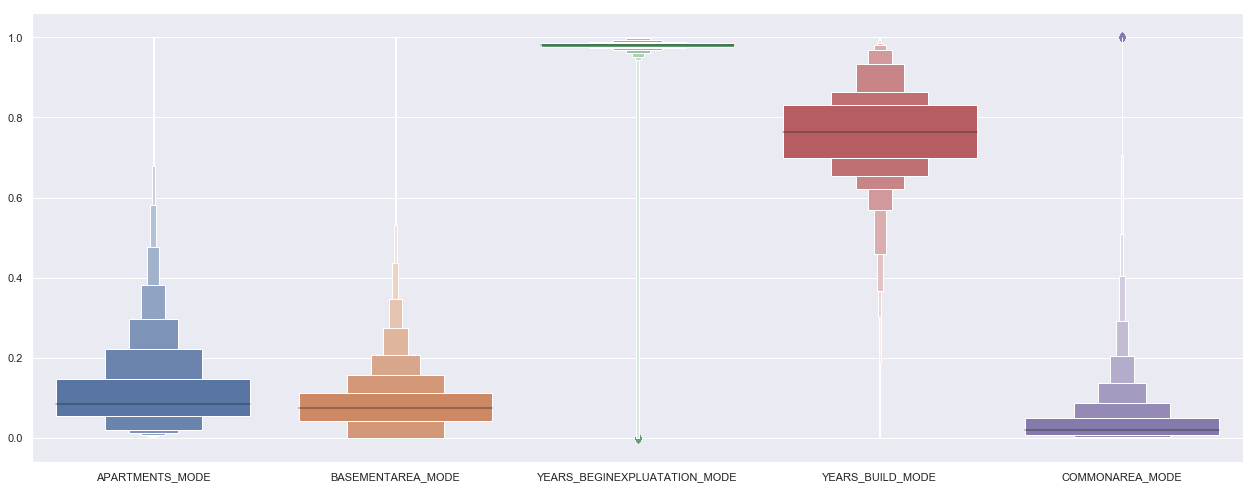

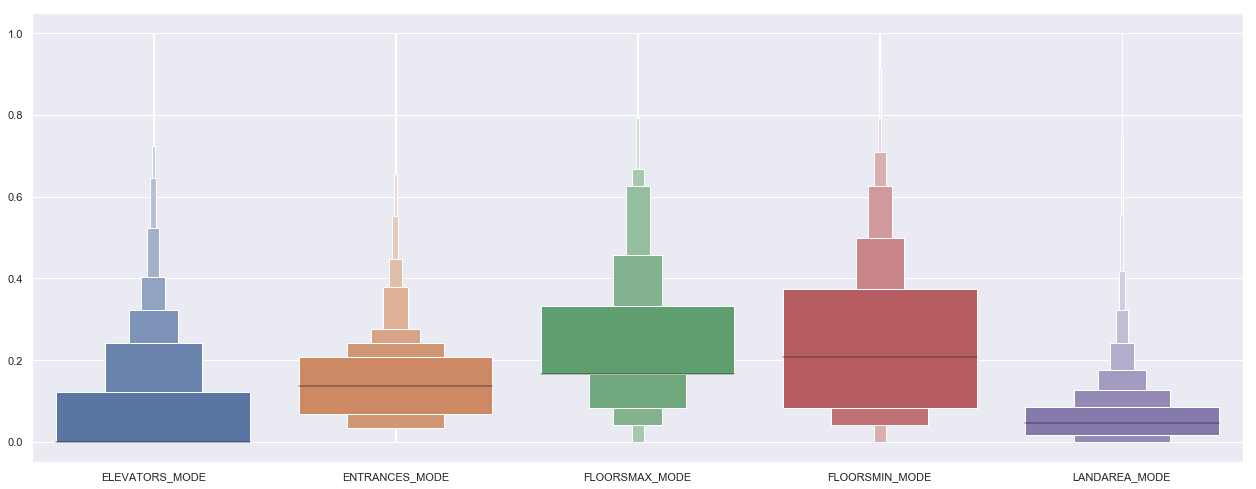

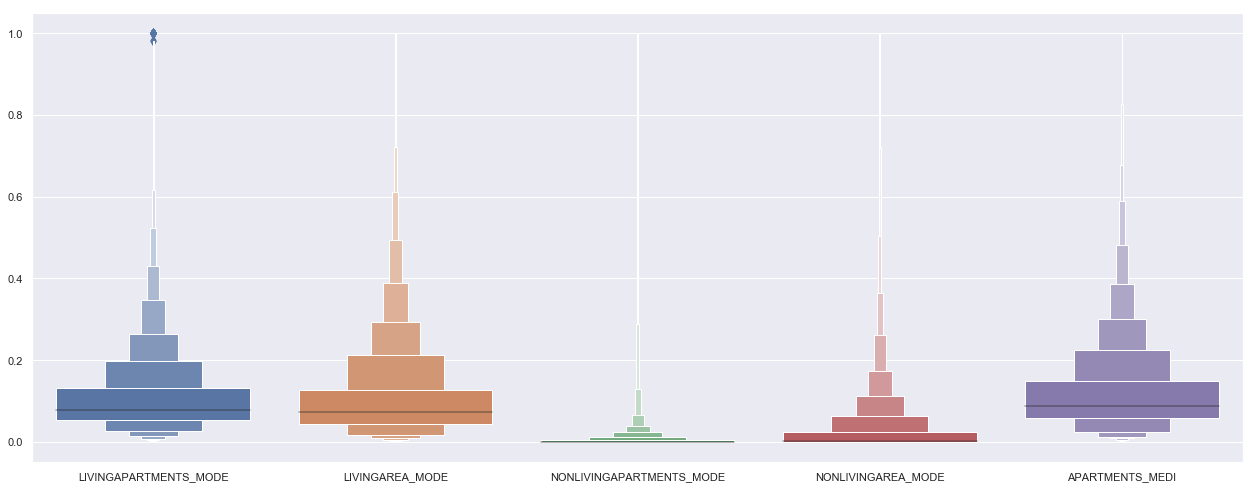

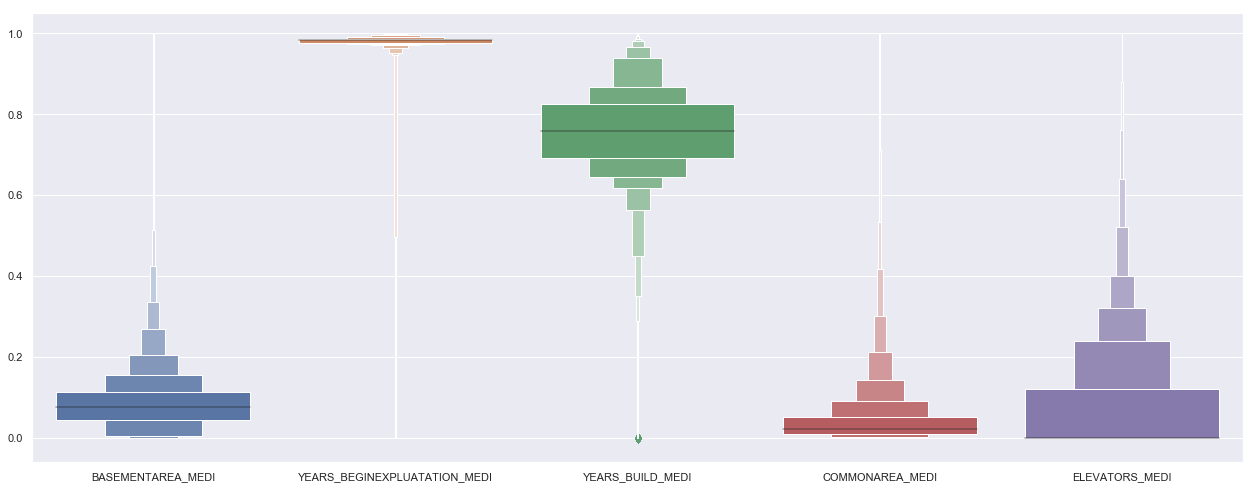

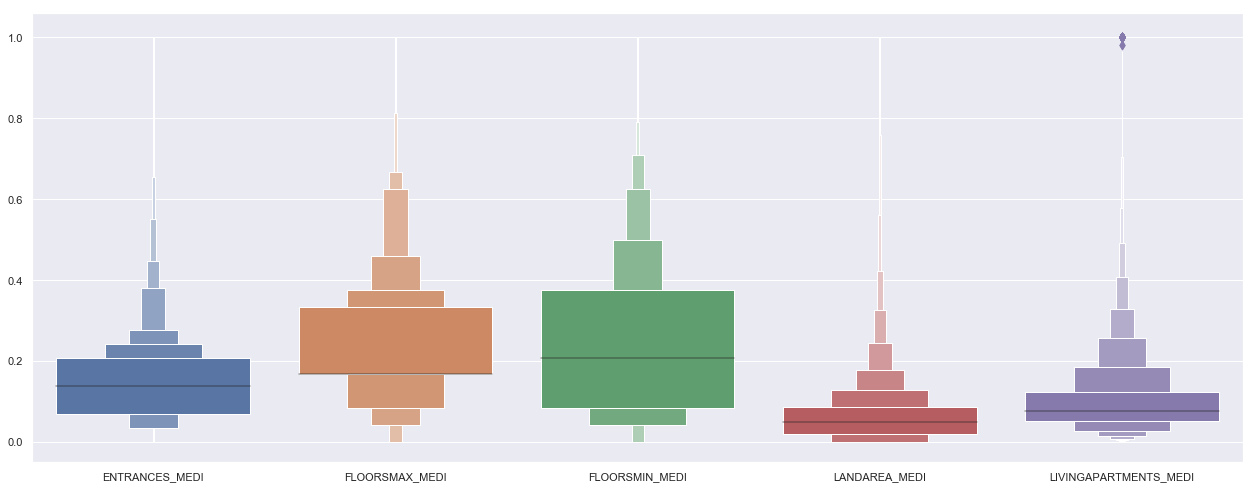

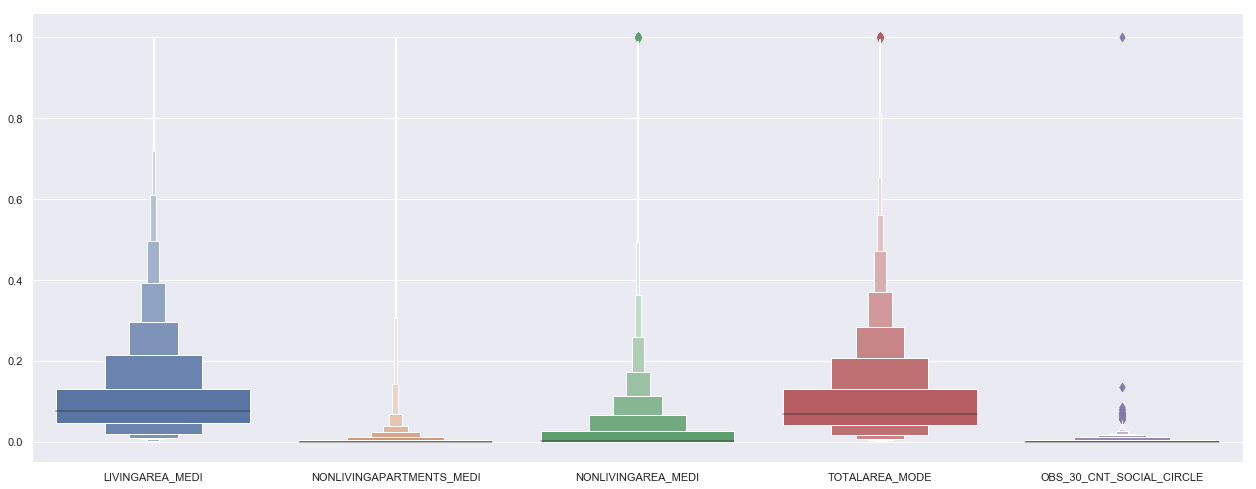

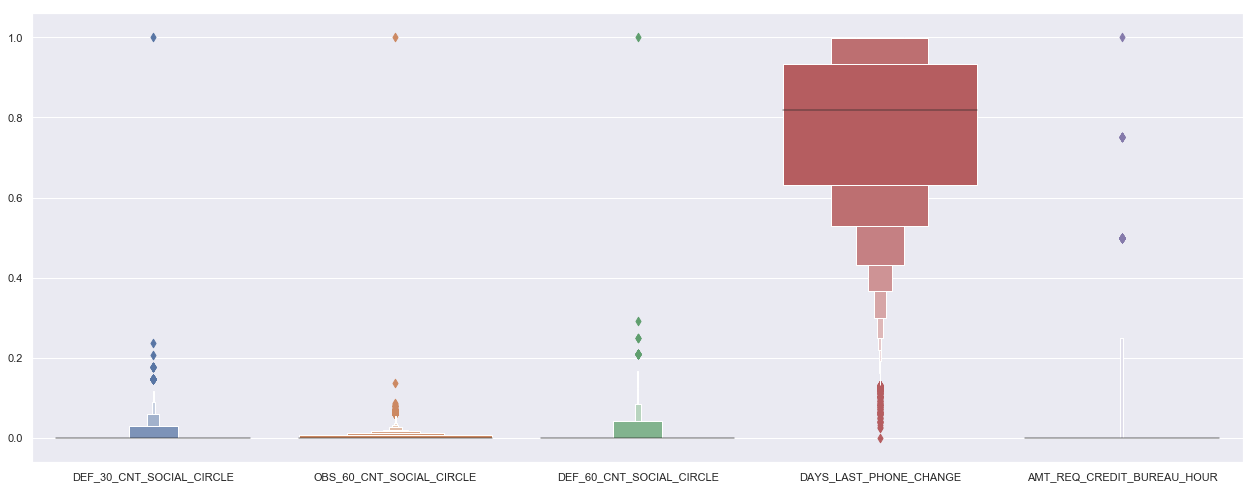

<Figure size 1562.4x595.44 with 0 Axes>

In [26]:
sns.set(rc={'figure.figsize':(21.7,8.27)})
col_len = len(list(dfTarget0_num.columns))
for i in range(0, col_len, 5):
    prev = i-5 if i>5 else 0
    if i == 0:
        continue
    else:
        sns.boxenplot(data=dfTarget0_num.iloc[:,prev:i])
        plt.figure()

### Remove outliers outside Q1-Q3

In [20]:
#Outlier Treatment

def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p
    return df

In [21]:
dfTarget1_num = outlier_detect(dfTarget1_num)
dfTarget0_num = outlier_detect(dfTarget0_num)

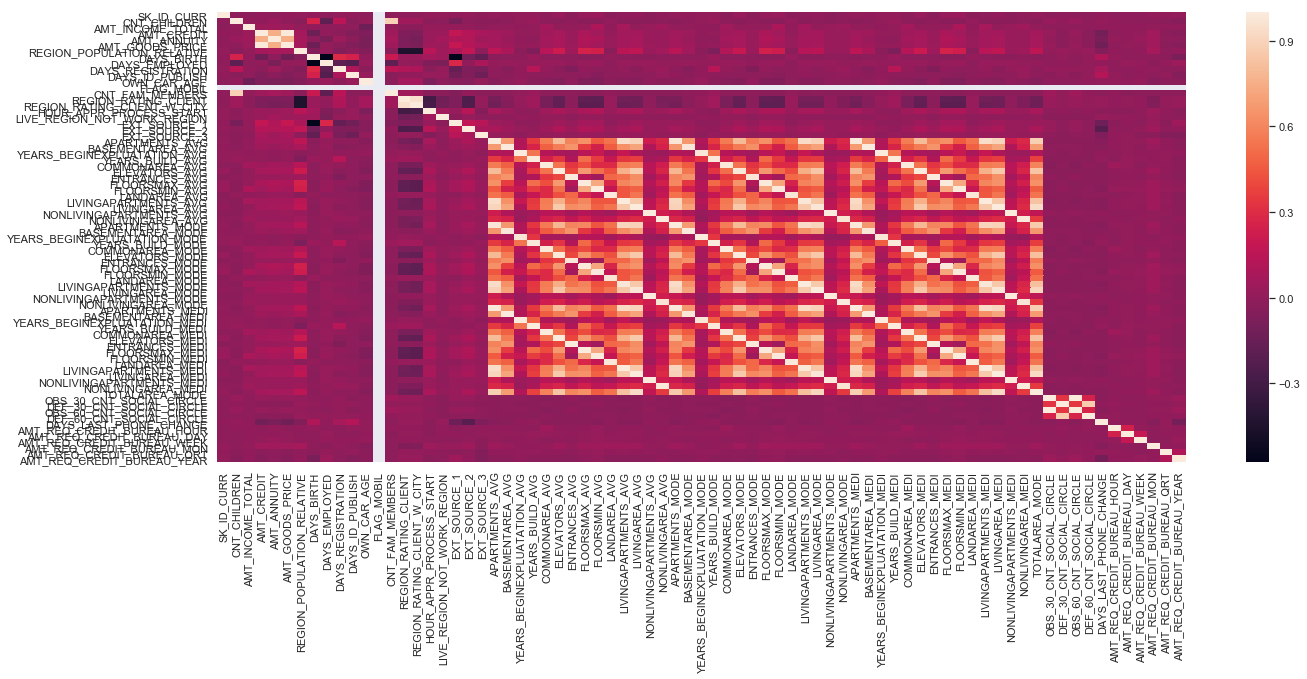

In [27]:
corr = dfTarget1_num.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [28]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [29]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(dfTarget1_num, 30))

Top Absolute Correlations
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE        0.998269
BASEMENTAREA_AVG             BASEMENTAREA_MEDI               0.998250
COMMONAREA_AVG               COMMONAREA_MEDI                 0.998107
YEARS_BUILD_AVG              YEARS_BUILD_MEDI                0.998100
NONLIVINGAPARTMENTS_AVG      NONLIVINGAPARTMENTS_MEDI        0.998075
FLOORSMIN_AVG                FLOORSMIN_MEDI                  0.997825
LIVINGAPARTMENTS_AVG         LIVINGAPARTMENTS_MEDI           0.997668
FLOORSMAX_AVG                FLOORSMAX_MEDI                  0.997187
NONLIVINGAPARTMENTS_MODE     NONLIVINGAPARTMENTS_MEDI        0.997032
ENTRANCES_AVG                ENTRANCES_MEDI                  0.996700
YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MEDI    0.996124
LIVINGAREA_AVG               LIVINGAREA_MEDI                 0.995968
NONLIVINGAPARTMENTS_AVG      NONLIVINGAPARTMENTS_MODE        0.995067
ELEVATORS_AVG                ELEVATORS_MEDI                  0.9